In [122]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")


In [123]:
df=pd.read_csv('C:\\Users\\HP\\Downloads\\stock_data.csv') #Importing Dataset
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True) #Naming the 'Date' column in dataset which was missing
df['date'] = pd.to_datetime(df['date']) #Convert date to datetime
df.head() #Display 1st 5 rows of dataset

,date,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
0,2020-01-01,101.764052,100.160928,99.494642,99.909756,101.761266
1,2020-01-02,102.171268,99.969968,98.682973,100.640755,102.528643
2,2020-01-03,103.171258,99.575237,98.182139,100.574847,101.887811
3,2020-01-04,105.483215,99.308641,97.149381,100.925017,101.490049
4,2020-01-05,107.453176,98.188428,99.575396,101.594411,101.604283


In [124]:
df.info() #Displays number of rows in each column and its datatype
print("\nMissing values per column:\n", df.isnull().sum()) #Display number of null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     365 non-null    datetime64[ns]
 1   Stock_1  365 non-null    float64       
 2   Stock_2  365 non-null    float64       
 3   Stock_3  365 non-null    float64       
 4   Stock_4  365 non-null    float64       
 5   Stock_5  365 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.2 KB

Missing values per column:
 date       0
Stock_1    0
Stock_2    0
Stock_3    0
Stock_4    0
Stock_5    0
dtype: int64


In [125]:
df.describe() #Displays mean, median, quartiles and min-max range of dataset

,date,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
count,365,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2020-07-01 00:00:00,107.882166,81.105216,94.519502,117.407560,106.866865
min,2020-01-01 00:00:00,91.474442,62.414219,81.111434,99.909756,99.833309
25%,2020-04-01 00:00:00,101.603117,69.328263,89.788068,112.209912,103.927072
50%,2020-07-01 00:00:00,107.421299,84.283525,94.495546,117.788079,106.411328
75%,2020-09-30 00:00:00,113.804614,91.548859,99.919465,123.132364,109.178007
max,2020-12-30 00:00:00,152.533679,100.160928,107.588373,129.911386,116.243803
std,NaN,7.756593,11.435212,6.519213,6.778527,3.760968


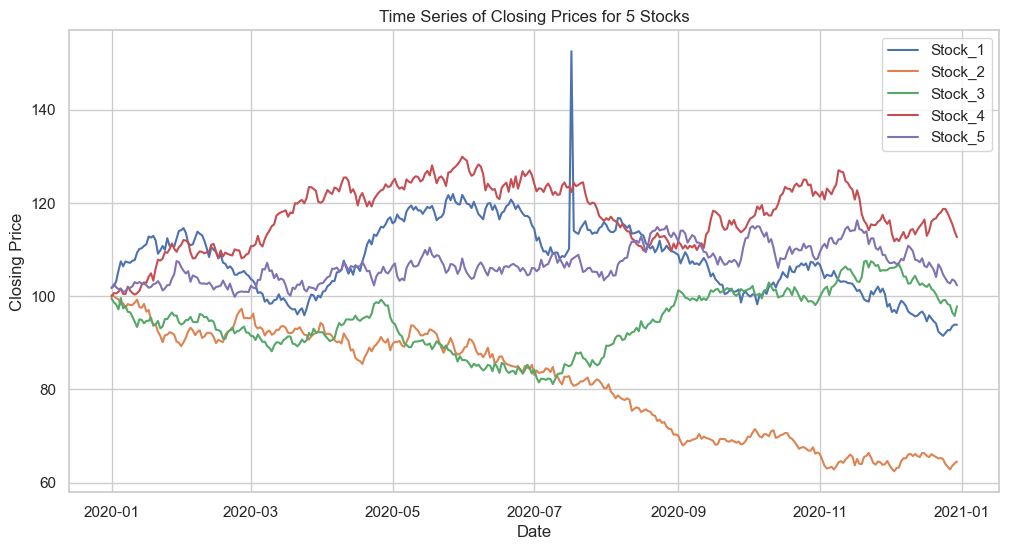

In [126]:
#Plot stock price over time for all stocks on the same graph

df.set_index('date', inplace=True)
plt.figure(figsize=(12,6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.title('Time Series of Closing Prices for 5 Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


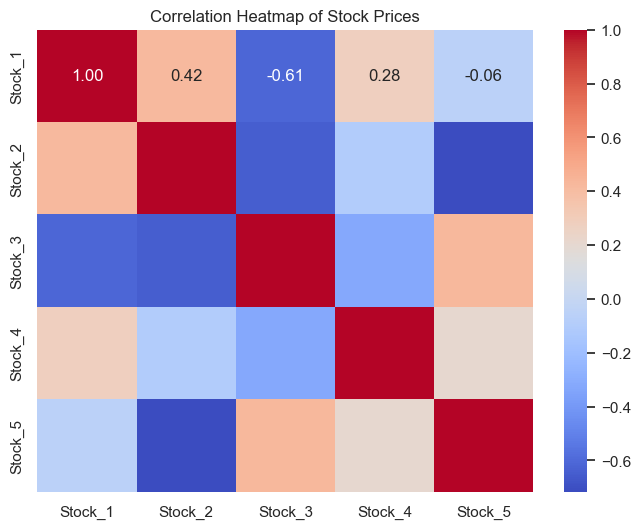

In [127]:
#Generates a correlation heatmap. Correlation helps understand the relation between stocks that is if they are related to each other directly or inversly

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Stock Prices")
plt.show()


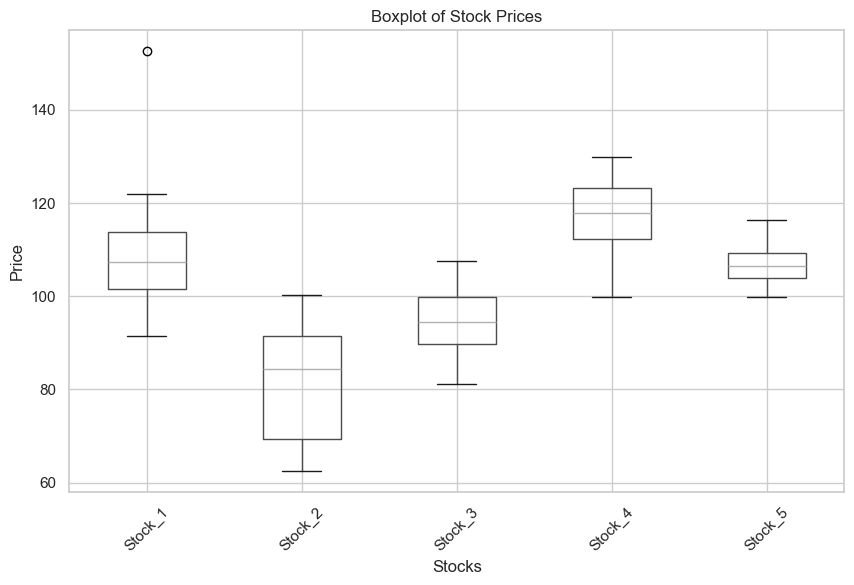

In [128]:
#Plots a boxplot to find if there are any outliers.

plt.figure(figsize=(10, 6)) #Sets figure/graph size. width x height
df.boxplot()
plt.title('Boxplot of Stock Prices')
plt.ylabel('Price')
plt.xlabel('Stocks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [129]:
X = df.iloc[:, 1:].values #Selects all columns except 1st column as input features
y = df.iloc[:, 0].values # Selects the first column as target variable


scaler = StandardScaler() #Initializes standard Scalar for normalization
X_scaled = scaler.fit_transform(X) #Scales input features to have zero mean and input variance

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) #Splits the dataset into 80% training and 20% testing


In [130]:
model = LinearRegression() #Initializes a Linear Regression model 
model.fit(X_train, y_train) #Trains the model using training data
predictions = model.predict(X_test) #Predicts the target value for the test data


In [131]:
#This cell evaluates the trained model using key metrics: Mean Squared Error, Root Mean Squared Error, and R² score to assess prediction accuracy.
#It also prints the learned coefficients for each feature, showing their impact on the prediction.

#Calculates Mean Squared Error, Root Mean Squared Error and R-squared score. 
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

print("\nModel Coefficients:")
for i, col in enumerate(df.columns[1:]):
    print(f"{col}: {model.coef_[i]:.4f}")


Mean Squared Error: 29.437581083843675
Root Mean Squared Error: 5.425641075840133
R-squared Score: 0.3869385166406619

Model Coefficients:
Stock_2: 3.1724
Stock_3: -4.0650
Stock_4: 0.6421
Stock_5: 3.2916


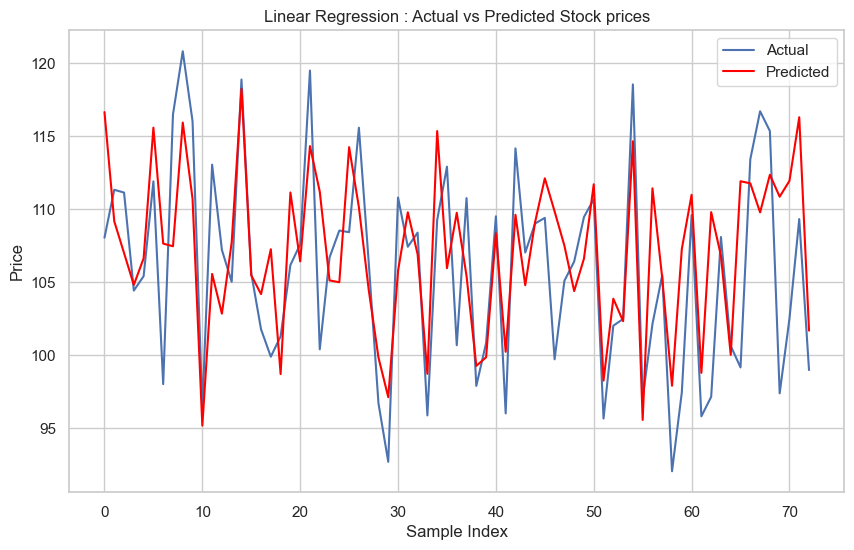

In [132]:
#This graph plots the predicted stock prices and actual stock prices. This helps in analyzing the accuracy of the model.

plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test, label='Actual') #Plots Actual stock prices i.e. the 20% training data from dataset
plt.plot(range(len(predictions)), predictions, color='red', label='Predicted') #Plot Predicted stock prices i.e. the 80% data used for training 
plt.title('Linear Regression : Actual vs Predicted Stock prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)